In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from tqdm import tqdm  # Para barra de progreso

# Multicolinealidad en Regresión Lineal


# Ejercicio 7


Vamos a generar un conjunto de datos sintéticos que presenten multicolinealidad entre predictores.

Generar `n = 100` samples de $X_1 ~ U(0, 1)$, de `Z ~ N(0, 0.1)` y de `ε ~ Normal(0, 1)`; a partir de ellas generar $n$ samples de $X_2 := 0.5X_1 + Z$ y de $$Y := 2 + 2X_1 + 0.3X_2 + ε$$



**Generación de datos**

In [6]:
# Número de muestras
n = 100

# variables
X1 = stats.uniform.rvs(size=n)
Z = stats.norm.rvs(loc = 0, scale = 0.1, size = n)
e = stats.norm.rvs(size = n)
X2 = 0.5*X1 + Z

Y = 2 + 2*X1 + 0.3*X2 + e

In [7]:
# Creación del DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
data.head()

,X1,X2,Y
0,0.951237,0.415823,2.817851
1,0.903678,0.421736,3.872723
2,0.131577,0.249222,3.130775
3,0.804386,0.377463,3.469698
4,0.964235,0.508260,5.819621


### Calcular la correlacion entre las muestras de $X_1$ y $X_2$ y graficar su distribucion conjunta.

In [8]:
# Cálculo de la correlación
corr = stats.pearsonr(X1,X2).statistic
print(corr)

0.8254890344189475


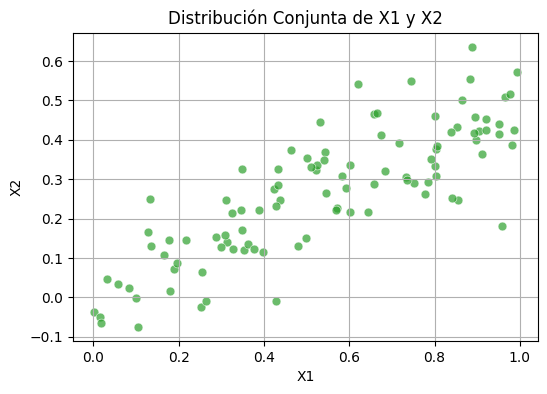

In [9]:
plt.figure(figsize=(6, 4))
#plt.scatter(X1, X2)
sns.scatterplot(x='X1', y='X2', data=data, color='#2ca02c', s=40, alpha=0.7)
plt.title('Distribución Conjunta de X1 y X2', fontsize=12)
plt.xlabel('X1', fontsize=10)
plt.ylabel('X2', fontsize=10)
plt.grid(True)

Hay una alta correlación entre las muestras de X1 y X2 ya que X2 está definida como una función lineal de X1 más un ruido.

El gráfico muestra una nube de puntos con una clara forma lineal debido a la relación $X_2=0.5X_1+Z$. A pesar del ruido Z, la relación lineal subyacente sigue siendo visible.

Esta correlación ilustra el concepto de multicolinealidad, que ocurre cuando dos o más predictores están linealmente relacionados y tiene implicaciones importantes para la interpretación de los coeficientes en modelos de regresión.

### (b): Ajuste del modelo de regresión múltiple

* Construimos manualmente la matriz de diseño (`X_intercept`) con una columna de unos (intercepto) y los predictores X1, X2.

* Aplicamos la fórmula OLS directamente: $$β=(X^T X)^{−1} X^T Y$$




In [10]:
X_intercept = np.column_stack((np.ones_like(Y), X1,X2))
beta_hat = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
print('betas originales = ', [2,2,0.3])
print('betas obtenidos = ', beta_hat)

betas originales =  [2, 2, 0.3]
betas obtenidos =  [2.16137524 1.3788654  1.3345083 ]


La multicolinealidad hace que sea difícil separar el efecto de $X_1$ y $X_2$ sobre $Y$.
Es algo que surge de cómo funciona la regresión múltiple, la multicolinealidad en sí no tiene nada de malo. De hecho, funciona bien para predecir. Pero dificulta la interpretación.
La predicción de $Y$ puede seguir siendo precisa pero los coeficientes individuales pierden interpretación directa



### (c): Ajustes de modelos individuales

**Utilizando solo las muestras de $X_1$**

In [11]:
#Solo con X1
X_intercept = np.column_stack((np.ones_like(Y), X1))
beta_hat = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
print('betas originales = ', [2,2])
print('betas obtenidos = ', beta_hat)

betas originales =  [2, 2]
betas obtenidos =  [2.17687626 2.00696048]


**Utilizando solo las muestras de $X_2$**

In [12]:
X_intercept = np.column_stack((np.ones_like(Y), X2))
beta_hat = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
print('betas originales = ', [2,0.3])
print('betas obtenidos = ', beta_hat)

betas originales =  [2, 0.3]
betas obtenidos =  [2.37682877 3.3308753 ]


$\hat{\beta_1}$ y $\hat{\beta_2}$ no son iguales a los coeficientes verdaderos, ya que parte de la información de $X_2$ se incorpora a $\hat{\beta_1}$ y viceversa.

## (d)

(d) Repetir el ajuste del modelo 1000 veces con diferentes muestras y graficar la distribución conjunta de
𝛽
^
1  y
𝛽
^
2.

In [13]:
# Simulación para analizar variabilidad de coeficientes
beta_1 = []
beta_2 = []
n = 100

for _ in range(1000):
    X1 = stats.uniform.rvs(size=n)
    Z = stats.norm.rvs(loc = 0, scale = 0.1, size = n)
    e = stats.norm.rvs(size = n)
    X2 = 0.5*X1 + Z
    Y = 2 + 2*X1 + 0.3*X2 + e


    # Ajustar el modelo con X1 y X2
    X_intercept = np.column_stack((np.ones_like(Y), X1,X2))
    beta_hat = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
    beta_1.append(beta_hat[1])
    beta_2.append(beta_hat[2])

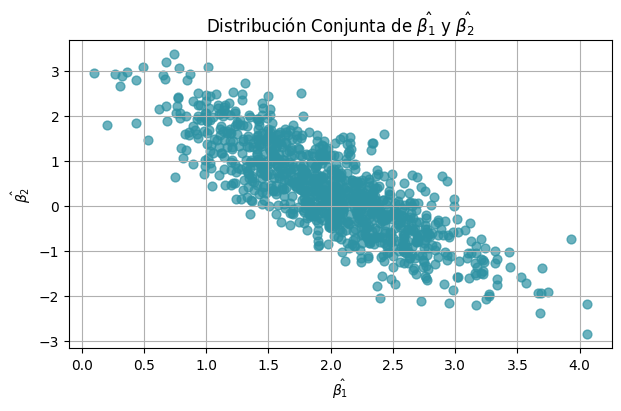

In [14]:
# Graficar la distribución conjunta  de los coeficientes ˆβ1 y ˆβ2
plt.figure(figsize=(7, 4))
plt.scatter(beta_1, beta_2,color='#2e92a3', s=40, alpha=0.7)
plt.title(r'Distribución Conjunta de $\hat{\beta_1}$ y $\hat{\beta_2}$')
plt.xlabel(r'$\hat{\beta_1}$')
plt.ylabel(r'$\hat{\beta_2}$')
plt.grid(True)

Las distribuciones de $\hat{\beta_1}$ y $\hat{\beta_2}$ están negativamente correlacionadas ya que, como ambas contienen casi la misma información, si insistis en incluir ambas en un modelo, entonces habría una cantidad casi infinita de combinaciones de b1 y b2 que producen las mismas predicciones.



Desde la perspectiva del modelo:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon$$
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 (0.5 X_1 + Z) + \varepsilon$$
$$Y = \beta_0 + (\beta_1 + 0.5 \beta_2) X_1 + \beta_2Z + \varepsilon$$


lo que muestra que los parámetros $\beta_1$ y $\beta_2$ no se pueden separar porque no influencian separadamente a $Y$ (a $\mu$ en realidad). Solamente su suma $(\beta_1 + 0.5 \beta_2)$ influencia $Y$ (el efecto total de $X_1$ está tenido en cuenta por $(\beta_1 + 0.5 \beta_2)$). Así que lo que termina pasando es que las distintas estimaciones de los coeficientes toman todas las combinaciones posibles de $\beta_1$ y $\beta_2$ que hacen que su suma se aproxime a la asociación real entre $X_1$ e $Y$.


Dado que $X_1$ y $X_2$ están "compitiendo" por explicar la misma porción de la variabilidad de $Y$, cuando uno de los coeficientes aumenta, el otro tiende a disminuir para no duplicar la contribución.


Lo que está respondiendo la regresión es “¿Cuál es el valor de conocer cada predictor, una vez que ya conozco los demás?” (por ejemplo “¿Cuál es el valor de conocer el largo de cada pierna una vez que ya conozco el largo de la otra?”).


**Las predicciones para $Y$ van a estar bien, pero no te va a decir cuál predictor es más importante.**

----